Tast1:   Predict the percentange of an student based on the no. of study hours.
dataset link:  http://bit.ly/w-data
Author: Amita Mishra

In [ ]:
##Importing the required librabies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

##Inspecting the data frame

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [12]:
##Data visualization

In [13]:
import warnings as wgs
wgs.filterwarnings("ignore")

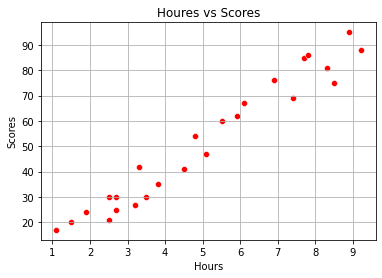

In [14]:
sns.scatterplot("Hours","Scores",color="r",data=df)
plt.title("Houres vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

In [15]:
##Spliting the data
x=df.drop("Scores",axis=1)
y=df["Scores"]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [17]:
print('x_train is',x_train.shape)
print('x_test is',y_test.shape)

x_train is (20, 1)
x_test is (5,)


In [18]:
##Training the algoritham


In [19]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [20]:
print("The intercept term of the linear model",LR.intercept_)
print("The coefficient term of the linear model",LR.coef_)

The intercept term of the linear model 2.018160041434683
The coefficient term of the linear model [9.91065648]


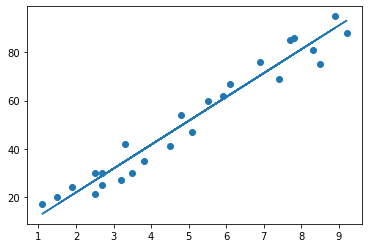

In [21]:
##Ploting the line (y=mx+c)
line=LR.coef_*x+LR.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [22]:
test_pred=LR.predict(x_test)

In [23]:
##Comparing actual VS predicted
df=pd.DataFrame({"Actual":y_test,"Predicted":test_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [25]:
##Testing with data
hours=9.25
random_pred = LR.predict([[hours]])
print("The predicted score if person studies for","hours is",random_pred[0])



The predicted score if person studies for hours is 93.69173248737538


In [ ]:
 ##Evaluating the Model


In [31]:
from sklearn import metrics
print("Mean Squared Error is",metrics.mean_squared_error(y_test,test_pred))
print("Mean Absolute Error is",metrics.mean_absolute_error(y_test,test_pred))

Mean Squared Error is 21.5987693072174
Mean Absolute Error is 4.183859899002975
